In [5]:
import numpy as np
import math 
%pylab inline
import matplotlib.pyplot as plt

class diagonal_gaussian_parametric:
    """
    1. Implement a diagonal Gaussian parametric density estimator. It 
    will have to work for data of arbitrary dimension d. As seen in 
    the labs, it should have a train() method to learn the parameters 
    and a method predict() which calculates the log density.
    """
    def __init__(self):
        pass
    
    def train(self, train_data):
        
        # if only one test_data is passed, add dummy dimension
        if len(np.shape(train_data)) == 1:
            train_data = np.expand_dims(train_data, axis=1)

        self.train_data = train_data
        
        try:
            self.n, self.d = np.shape(self.train_data)
        except:
            self.n = np.shape(self.train_data)
            self.d = 1

        self.mu = np.sum(self.train_data, axis=0) / self.n
        self.sigma = np.cov(self.train_data.T) * np.eye(self.d)
        
    def predict(self, test_data, nll=True):

        # if only one test_data is passed, add dummy dimension
        if len(np.shape(test_data)) == 1:
            test_data = np.expand_dims(test_data, axis=1).T

        self.test_data = test_data
        n_inputs = np.shape(test_data)[0]
        densities = np.zeros(n_inputs)
        
        sigma_inv = np.linalg.inv(self.sigma)
        sigma_det = np.linalg.det(self.sigma)
            
        normalizer = 1 / ((2* np.pi)**(self.d / 2) * np.sqrt(sigma_det)) 

        # we treat each input test_data independently
        for i in range(n_inputs):

            diff = self.test_data[i, :] - self.mu
            exponent = (-0.5) * (diff).T.dot(sigma_inv).dot(diff)

            if nll:
                p = -np.log(normalizer)*exponent
            else:
                p = normalizer*np.exp(exponent)
            
            # handle edge case where p(x)=0
            if p == 0:
                p = np.finfo(float).eps
                
            densities[i] = p
        
        return(densities)
    
class parzen_density_estimator:
    """
    2. Implement a Parzen density estimator with an isotropic Gaussian 
    kernel. It will have to work for data of arbitrary dimension d. 
    Likewise it should have a train() method and a predict() method 
    that computes the log density.
    """
    def __init__(self):
        pass
    
    def train(self, train_data, sigma=0):
        self.train_data = np.expand_dims(train_data, axis=1)
        
        try:
            self.n, self.d = np.shape(self.train_data)
        except:
            self.n = np.shape(self.train_data)
            self.d = 1
        
        if sigma == 0:
            self.sigma = np.std(self.train_data) # std because isotropic Gaussian
        else:
            self.sigma = sigma
            
    def predict(self, test_data, nll=True):
        
        # if only one test_data is passed, add dummy dimension
        if len(np.shape(test_data)) == 1:
            test_data = np.expand_dims(test_data, axis=1).T

        self.test_data = test_data
        n_inputs = np.shape(self.test_data)[0]
        n_train = np.shape(self.train_data)[0]
        densities = np.zeros(n_inputs)
        normalizer = 1/((2*np.pi*self.sigma)**(self.d / 2))
        
        for i in range(n_inputs): 
            
            # calculate avg dist b/t this training point and all test points
            p = 0 
            for j in range(n_train):
            
                # for gaussian kernel we use euclidean distance
                distance = np.sum((self.test_data[i, :] - self.train_data[j, :])**2)
                exponent = (-0.5) * (distance / self.sigma)
                
                if nll:
                    p += -np.log(normalizer)*exponent
                else:
                    p += normalizer * np.exp(exponent)

            # handle edge case where p(x)=0
            if p == 0:
                p = np.finfo(float).eps
                
            # save the average kernel values across all training points
            densities[i] = p/n_train
        
        return(densities)

Populating the interactive namespace from numpy and matplotlib


/opt/python/sci_36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


1D Densities
-----------

From the Iris dataset examples, choose a subset corresponding to one of the classes (of your choice), and one of the characteristic features, so that we will be in dimension d = 1 and produce a single graph (using the plot function) including:

+ the data points of the subset (displayed on the x axis).
+ a plot of the density estimated by your parametric Gaussian estimator.
+ a plot of the density estimated by the Parzen estimator with a hyper-parameter σ (standard deviation) too small.
+ a plot of the density estimated by the Parzen estimator with the hyper-parameter σ being a little too big.
+ a plot of the density estimated by the Parzen estimator with the hyper-parameter σ that you consider more appropriate. Use a different color for each plot, and provide your graph with a clear legend.
+ Explain how you chose your hyper-parameter σ.

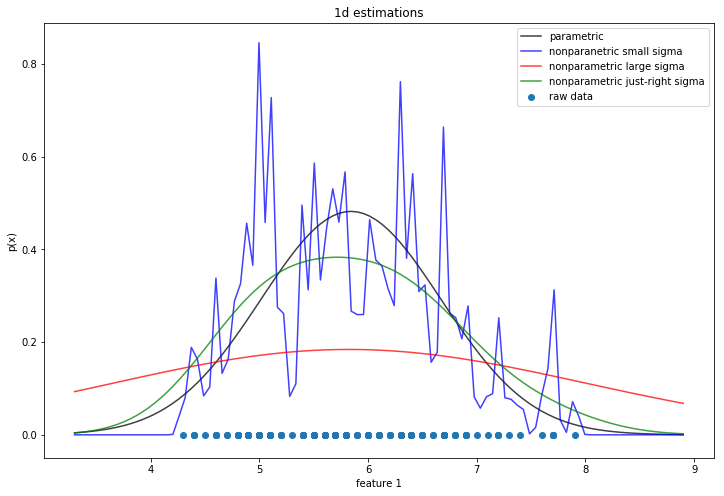

In [6]:
# load data
iris = np.loadtxt("iris.txt")
iris_subset = iris[:,0]
n = len(iris_subset)

# general plotting variables
n_bins = 100
axes_min = np.min(iris_subset)-1
axes_max = np.max(iris_subset)+1
alpha=0.75

small_sig = 0.001
large_sig = 4
moyen_sig = 0.25

x = np.atleast_2d(np.linspace(axes_min, axes_max, n_bins)).T

# (a) -- raw data
plt.figure(figsize=(12, 8))
plt.scatter(iris_subset, np.zeros(len(iris_subset)))

# (b) -- parametric model
flower = diagonal_gaussian_parametric()
flower.train(iris_subset)
density = flower.predict(x, nll=False)
plt.plot(x, density, color='black', alpha=alpha)

# (c) -- nonparametric small sigma
flower = parzen_density_estimator()
flower.train(iris_subset, sigma=small_sig)
density2 = flower.predict(x, nll=False)
plt.plot(x, density2, color='blue', alpha=alpha)

# (d) -- nonparametric large sigma
flower = parzen_density_estimator()
flower.train(iris_subset, sigma=large_sig)
density = flower.predict(x, nll=False)
plt.plot(x, density, color='red', alpha=alpha)

# (e) -- nonparametric just-right sigma
flower = parzen_density_estimator()
flower.train(iris_subset, sigma=moyen_sig)
density = flower.predict(x, nll=False)
plt.plot(x, density, color='green', alpha=alpha)

# legend
plt.legend(['parametric', 
            'nonparanetric small sigma',
            'nonparametric large sigma',
            'nonparametric just-right sigma',
            'raw data'])

plt.title('1d estimations')
plt.xlabel('feature 1')
plt.ylabel('p(x)')
plt.show()

We chose sigma based on how it looked on the plot. The very large sigma (4) was chosen to encompase lots of empty feature space and the very small sigma (0.001) was chosen to be very sensitive to each data point. For the 'just right' sigma (0.25), we chose a value that mostly covered the data distribution without it encompasing too much empty feature space.


2D Densities
-----------

Now add a second characteristic feature of Iris, in order to have entries in d = 2 and produce 4 plots, each displaying the points of the subset of the data (with the plot function ), and the contour lines of the density estimated (using the contour function):

+ by the diagonal Gaussian parametric estimator.
+ by the Parzen estimator with the hyper-parameter σ (standard deviation ) being too small.
+ by the Parzen estimator with the hyper-parameter σ being a little too big.
+ by the Parzen estimator with the hyper-parameter σ that you consider more appropriate.
+ Explain how you chose your hyper-parameter σ

In [7]:
def make_dimensions(x_min, x_max, y_min, y_max, n_bins):
    X = np.atleast_2d(np.linspace(x_min, x_max, n_bins)).T
    Y = np.atleast_2d(np.linspace(y_min, y_max, n_bins)).T
    l = len(X) * len(Y)
    Z = np.zeros([l, 2])
    i = 0
    for x in X:
        for y in Y:
            Z[i, 0] = x
            Z[i, 1] = y
            i += 1
    
    return X, Y, Z
        

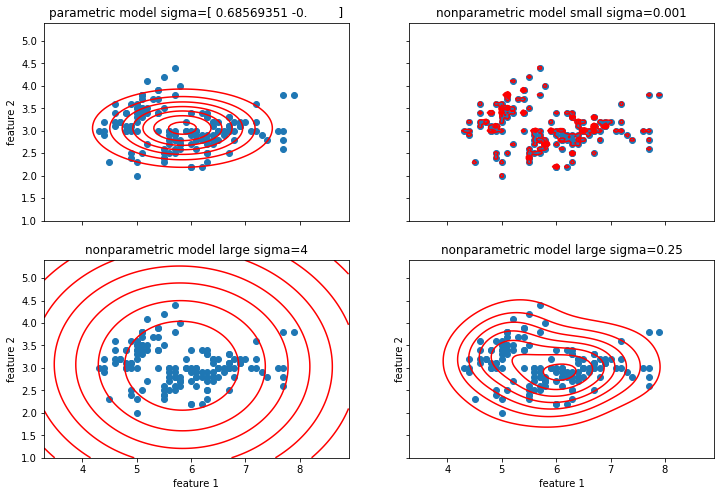

In [9]:
# new data subset
iris_subset = iris[:,0:2]

# general plotting variables
n_bins = 100
x_min = np.min(iris_subset[:,0])-1
x_max = np.max(iris_subset[:,0])+1
y_min = np.min(iris_subset[:,1])-1
y_max = np.max(iris_subset[:,1])+1
alpha=0.75

# plot time
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8), sharex=True, 
                                                                  sharey=True)

# add raw data
ax1.scatter(iris_subset[:, 0], iris_subset[:, 1])
ax2.scatter(iris_subset[:, 0], iris_subset[:, 1])
ax3.scatter(iris_subset[:, 0], iris_subset[:, 1])
ax4.scatter(iris_subset[:, 0], iris_subset[:, 1])

# (b) -- parametric model
flower = diagonal_gaussian_parametric()
flower.train(iris_subset)
X, Y, Z = make_dimensions(x_min, x_max, y_min, y_max, n_bins)
X, Y = np.meshgrid(X, Y)
density = flower.predict(Z, nll=False).reshape(n_bins, n_bins)
ax1.contour(X, Y, density.T, colors='red')
ax1.set_title('parametric model sigma={}'.format(flower.sigma[0]))
ax1.set_ylabel('feature 2')

# (c) -- nonparametric model, small sigma
flower = parzen_density_estimator()
flower.train(iris_subset, sigma=small_sig)
X, Y, Z = make_dimensions(x_min, x_max, y_min, y_max, n_bins)
X, Y = np.meshgrid(X, Y)
density = flower.predict(Z, nll=False).reshape(n_bins, n_bins)
ax2.contour(X, Y, density.T, colors='red')
ax2.set_title('nonparametric model small sigma={}'.format(small_sig))

# (d) -- nonparametric model, large sigma
flower = parzen_density_estimator()
flower.train(iris_subset, sigma=large_sig)
X, Y, Z = make_dimensions(x_min, x_max, y_min, y_max, n_bins)
X, Y = np.meshgrid(X, Y)
density = flower.predict(Z, nll=False).reshape(n_bins, n_bins)
ax3.contour(X, Y, density.T, colors='red')
ax3.set_title('nonparametric model large sigma={}'.format(large_sig))
ax3.set_xlabel('feature 1')
ax3.set_ylabel('feature 2')

# (e) -- nonparametric model, just right sigma
flower = parzen_density_estimator()
flower.train(iris_subset, sigma=moyen_sig)
X, Y, Z = make_dimensions(x_min, x_max, y_min, y_max, n_bins)
X, Y = np.meshgrid(X, Y)
density = flower.predict(Z, nll=False).reshape(n_bins, n_bins)
ax4.contour(X, Y, density.T, colors='red')
ax4.set_title('nonparametric model large sigma={}'.format(moyen_sig))
ax4.set_xlabel('feature 1')
ax4.set_ylabel('feature 2')

plt.show()

We chose sigma based on how it looked on the plot. The very large sigma (4) was chosen to encompase lots of empty feature space and the very small sigma (0.001) was chosen to tightly wrap each data point. For the 'just right' sigma (0.25), we chose a value that mostly covered the data distribution without it encompasing too much empty feature space.
